In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
full_path = 'C:\\Users\\siva\\Documents\\Mushroom Prediction\\mushroom_data_all.csv'
dataset = pd.read_csv(full_path)

In [45]:
dataset

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_edible              8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [47]:
dataset.describe().T

,count,unique,top,freq
class_edible,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [48]:
dataset = dataset.drop(["veil-type"], axis=1)

In [49]:
dataset.isnull().sum()

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [50]:
X = dataset.drop(["class_edible"], axis = 1)
Y = dataset["class_edible"]

In [51]:
Y.value_counts(normalize=True)

class_edible
e    0.517971
p    0.482029
Name: proportion, dtype: float64

In [52]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [53]:
X_encoded = OrdinalEncoder().fit_transform(X)
Y_encoded = LabelEncoder().fit_transform(Y)

In [54]:
Y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_encoded, test_size = 0.2, random_state = 42, stratify = Y_encoded)

In [56]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
print("Train Accuracy:", dtc.score(X_train, Y_train))
print("Test Accuracy:", dtc.score(X_test, Y_test))

Train Accuracy: 1.0
Test Accuracy: 1.0


In [58]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, Y_train)

print("Train Accuracy:", rfc.score(X_train, Y_train))
print("Test Accuracy:", rfc.score(X_test, Y_test))

Train Accuracy: 1.0
Test Accuracy: 1.0


In [70]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
dt_scores = cross_val_score(dtc, X_train, Y_train, cv = skf, scoring = 'accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print(f"Average Accuracy: {np.mean(dt_scores):.4f}")

Decision Tree Cross-Validation Scores: [0.99846154 1.         1.         1.         1.        ]
Average Accuracy: 0.9997


In [71]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
rf_scores = cross_val_score(rfc, X_train, Y_train, cv = skf, scoring = 'accuracy')

print("Random Forest Cross-Validation Scores:", rf_scores)
print(f"Average Accuracy: {np.mean(rf_scores):.4f}")

Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0000


C:\Users\siva\AppData\Local\Temp\ipykernel_16788\1862941149.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])


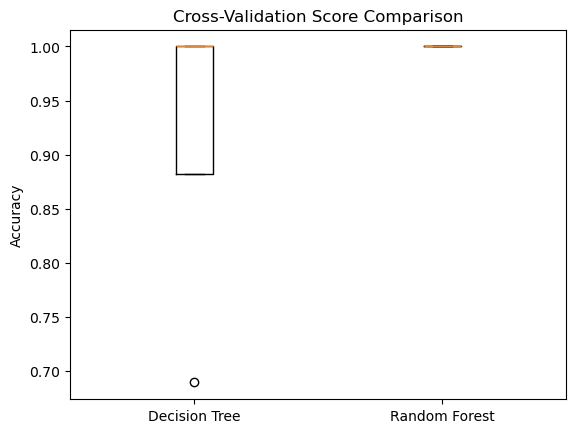

In [21]:
import matplotlib.pyplot as plt

dt_scores = [0.8818, 1.0, 1.0, 1.0, 0.6897]
rf_scores = [1.0, 1.0, 1.0, 1.0, 1.0]

plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])
plt.title("Cross-Validation Score Comparison")
plt.ylabel("Accuracy")
plt.show()


C:\Users\siva\AppData\Local\Temp\ipykernel_16788\1862941149.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])


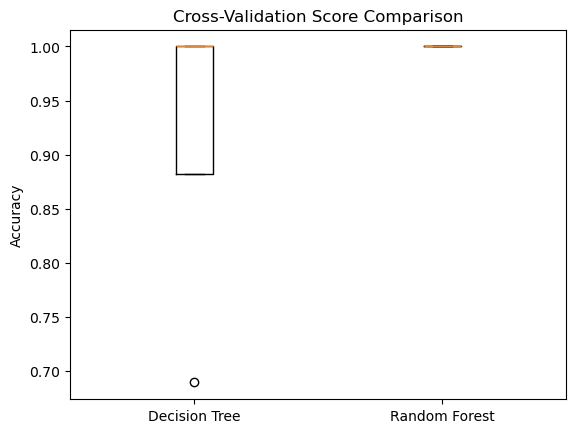

In [21]:
import matplotlib.pyplot as plt

dt_scores = [0.8818, 1.0, 1.0, 1.0, 0.6897]
rf_scores = [1.0, 1.0, 1.0, 1.0, 1.0]

plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])
plt.title("Cross-Validation Score Comparison")
plt.ylabel("Accuracy")
plt.show()
